In [137]:
import awkward as ak
import uproot
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

import seaborn as sns
from scipy import stats

from coffea.nanoevents import NanoEventsFactory, BaseSchema

In [5]:
#Download data

#!wget https://emdhgcalae.nrp-nautilus.io/features/ntuple.root

!wget https://emdhgcalae.nrp-nautilus.io/features/low_pt.csv
    
!wget https://emdhgcalae.nrp-nautilus.io/features/high_pt.csv

--2022-09-11 23:50:14--  https://emdhgcalae.nrp-nautilus.io/features/low_pt.csv
Resolving emdhgcalae.nrp-nautilus.io (emdhgcalae.nrp-nautilus.io)... 67.58.53.214
Connecting to emdhgcalae.nrp-nautilus.io (emdhgcalae.nrp-nautilus.io)|67.58.53.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487902070 (465M) [text/csv]
Saving to: ‘low_pt.csv’

low_pt.csv          100%[===================>] 465.30M  15.8MB/s    in 52s     

2022-09-11 23:51:05 (9.00 MB/s) - ‘low_pt.csv’ saved [487902070/487902070]

--2022-09-11 23:51:06--  https://emdhgcalae.nrp-nautilus.io/features/high_pt.csv
Resolving emdhgcalae.nrp-nautilus.io (emdhgcalae.nrp-nautilus.io)... 67.58.53.214
Connecting to emdhgcalae.nrp-nautilus.io (emdhgcalae.nrp-nautilus.io)|67.58.53.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490955314 (2.3G) [text/csv]
Saving to: ‘high_pt.csv’

high_pt.csv         100%[===================>]   2.32G  25.7MB/s    in 82s     

2022-09-11 23:5

In [4]:
signaldomain = '/ecoderemdvol/features/ntuple.root'
signalfile = uproot.open(signaldomain)

In [5]:
events = NanoEventsFactory.from_root(
    signalfile,
    treepath='FloatingpointThreshold0DummyHistomaxGenmatchGenclustersntuple/HGCalTriggerNtuple',
    #entry_stop=10,
    #metadata={"dataset": "llp"},
    schemaclass=BaseSchema,
).events()

In [6]:
gen_pt = events.gen_pt[:,0]
gen_eta = events.gen_eta[:,0]

In [11]:
gen_pt_all = np.append(gen_pt_all,gen_pt)
gen_eta_all = np.append(gen_eta_all,gen_eta)

In [8]:
np.count_nonzero(gen_pt < 35), np.count_nonzero(gen_pt >=35)

(564, 2851)

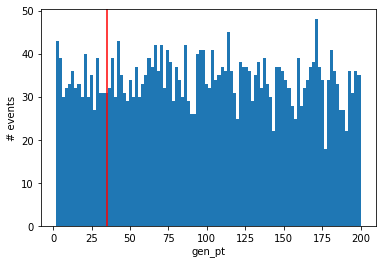

In [9]:
plt.hist(gen_pt,100);
plt.xlabel('gen_pt')
plt.ylabel('# events')
plt.axvline(x = 35,color = 'red')

Text(0, 0.5, '# events')

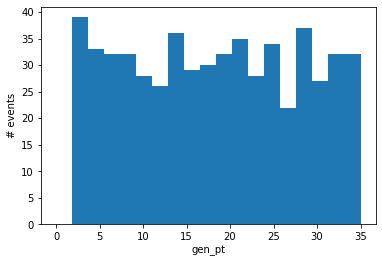

In [13]:
plt.hist(gen_pt,bins=np.linspace(0,35,20));
plt.xlabel('gen_pt')
plt.ylabel('# events')

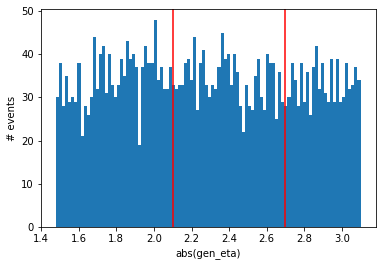

In [15]:
plt.hist(abs(gen_eta),100);
plt.xlabel('abs(gen_eta)')
plt.ylabel('# events')

read low and high pT trigger cell data for all layers


In [132]:
low_pt_data  = pd.read_csv('low_pt.csv',  nrows = 1000000)

In [133]:
high_pt_data  = pd.read_csv('high_pt.csv',nrows = 1000000)

Text(0, 0.5, '# wafers')

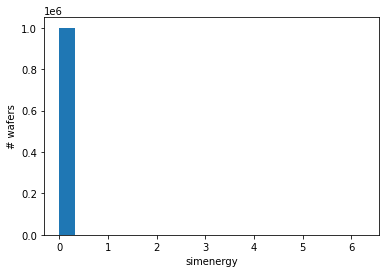

In [8]:
plt.hist(low_pt_data['simenergy'],20)
plt.xlabel('simenergy')
#plt.yscale('log')
plt.ylabel('# wafers')

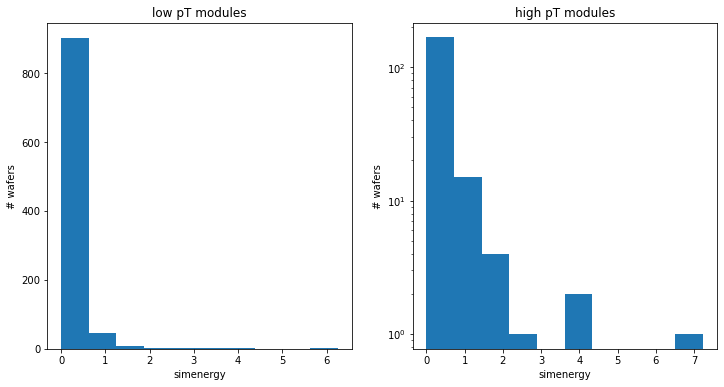

In [9]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].hist(low_pt_data['simenergy'][low_pt_data.simenergy>0],10)
axes[1].hist(high_pt_data['simenergy'][high_pt_data.simenergy>0],10)
axes[0].set_xlabel('simenergy')
axes[0].set_ylabel('# wafers')
axes[1].set_xlabel('simenergy')
axes[1].set_ylabel('# wafers')
plt.yscale('log')
axes[0].set_title('low pT modules')
axes[1].set_title('high pT modules');


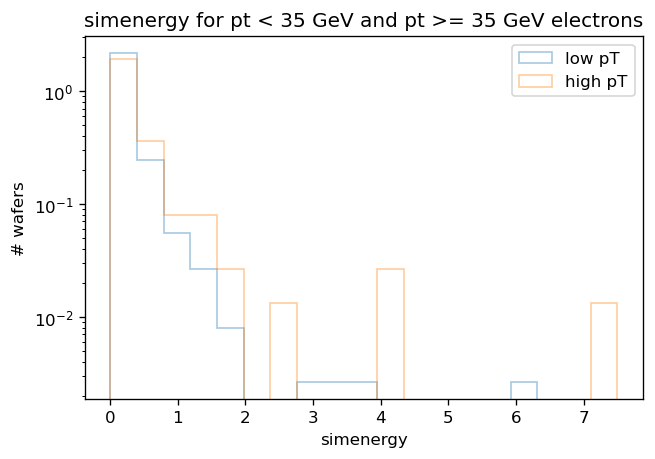

In [138]:
plt.close()
plt.hist(low_pt_data['simenergy'][low_pt_data.simenergy>0],bins = np.linspace(0,7.5,20),alpha=0.4,label = 'low pT',histtype='step', density = True)
plt.hist(high_pt_data['simenergy'][high_pt_data.simenergy>0],bins = np.linspace(0,7.5,20),alpha=0.4,label = 'high pT',histtype='step', density = True)
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.legend()
plt.title('simenergy for pt < 35 GeV and pt >= 35 GeV electrons');

Now plotting only for pT < 35 GeV electrons

In [139]:
low_pt_data  = pd.read_csv('low_pt.csv')

In [140]:
sim = np.sort(low_pt_data['simenergy'][low_pt_data.simenergy>0])

In [141]:
np.min(sim), np.mean(sim), np.max(sim)

(2.127252e-07, 1.8875492270795713, 72.335266)

In [142]:
w_sim = low_pt_data[low_pt_data.simenergy>0]

In [143]:
len(w_sim['simenergy'])/len(low_pt_data['simenergy'])

0.008032215063596828

/tmp/ipykernel_335/3963193154.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = w_sim[w_sim.simenergy >= low_max][w_sim.simenergy < med_max]


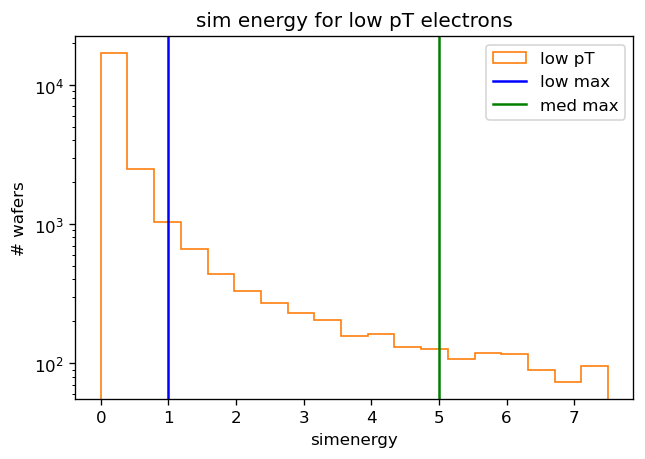

In [144]:
#choose thresholds arbitrarily and normalize histograms later

low_max, med_max= 1,5

low = w_sim[w_sim.simenergy < low_max]
med = w_sim[w_sim.simenergy >= low_max][w_sim.simenergy < med_max]
high = w_sim[w_sim.simenergy >= med_max]

plt.close()
plt.hist(low_pt_data['simenergy'][low_pt_data.simenergy>0],bins = np.linspace(0,7.5,20),label = 'low pT',color = 'tab:orange',histtype='step')
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.axvline(x = low_max,color = 'blue',label = 'low max')
plt.axvline(x = med_max,color = 'green',label = 'med max')
plt.legend()
plt.title('sim energy for low pT electrons');

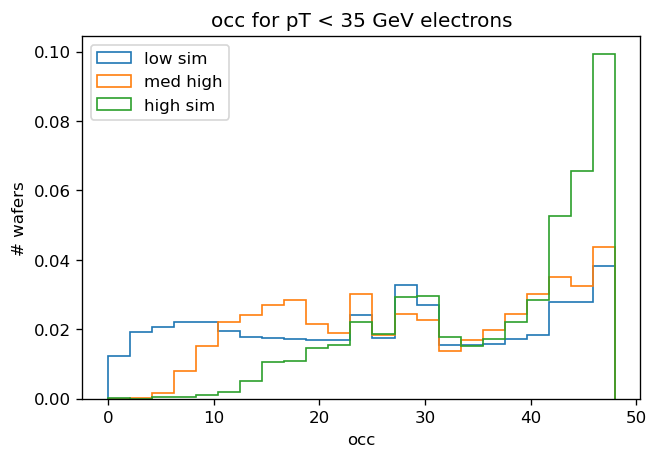

In [145]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
low_calQ = low[CALQ_COLS]
med_calQ = med[CALQ_COLS]
high_calQ = high[CALQ_COLS]

low_occ = np.count_nonzero(low_calQ,axis=1)
med_occ = np.count_nonzero(med_calQ,axis=1)
high_occ = np.count_nonzero(high_calQ,axis=1)

#Normalize histograms

plt.hist(low_occ, bins = np.linspace(0,48,24),label = 'low sim',histtype='step',density = True)
plt.hist(med_occ, bins = np.linspace(0,48,24),label = 'med high',histtype='step',density = True)
plt.hist(high_occ, bins = np.linspace(0,48,24),label = 'high sim',histtype='step',density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons');

In [146]:
low['occ'] = low_occ;
med['occ'] = med_occ;
high['occ'] = high_occ;

/tmp/ipykernel_335/1914247685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['occ'] = low_occ;
/tmp/ipykernel_335/1914247685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['occ'] = high_occ;


In [147]:
eta_bin_edges = np.linspace(1.5,3.1,9)
layer_bin_edges =np.linspace(0,35,8)

In [148]:
low_mean,x_bins,y_bins,c = stats.binned_statistic_2d(x = low['tc_eta'],
                                                       y = low['layer'],
                                                       values = low['occ'],
                                                       statistic = 'mean',
                                                       bins=[eta_bin_edges,layer_bin_edges])
med_mean,x_bins,y_bins,c = stats.binned_statistic_2d(x = med['tc_eta'],
                                                       y = med['layer'],
                                                       values = med['occ'],
                                                       statistic = 'mean',
                                                       bins=[eta_bin_edges,layer_bin_edges])
high_mean,x_bins,y_bins,c = stats.binned_statistic_2d(x = high['tc_eta'],
                                                       y = high['layer'],
                                                       values = high['occ'],
                                                       statistic = 'mean',
                                                       bins=[eta_bin_edges,layer_bin_edges])

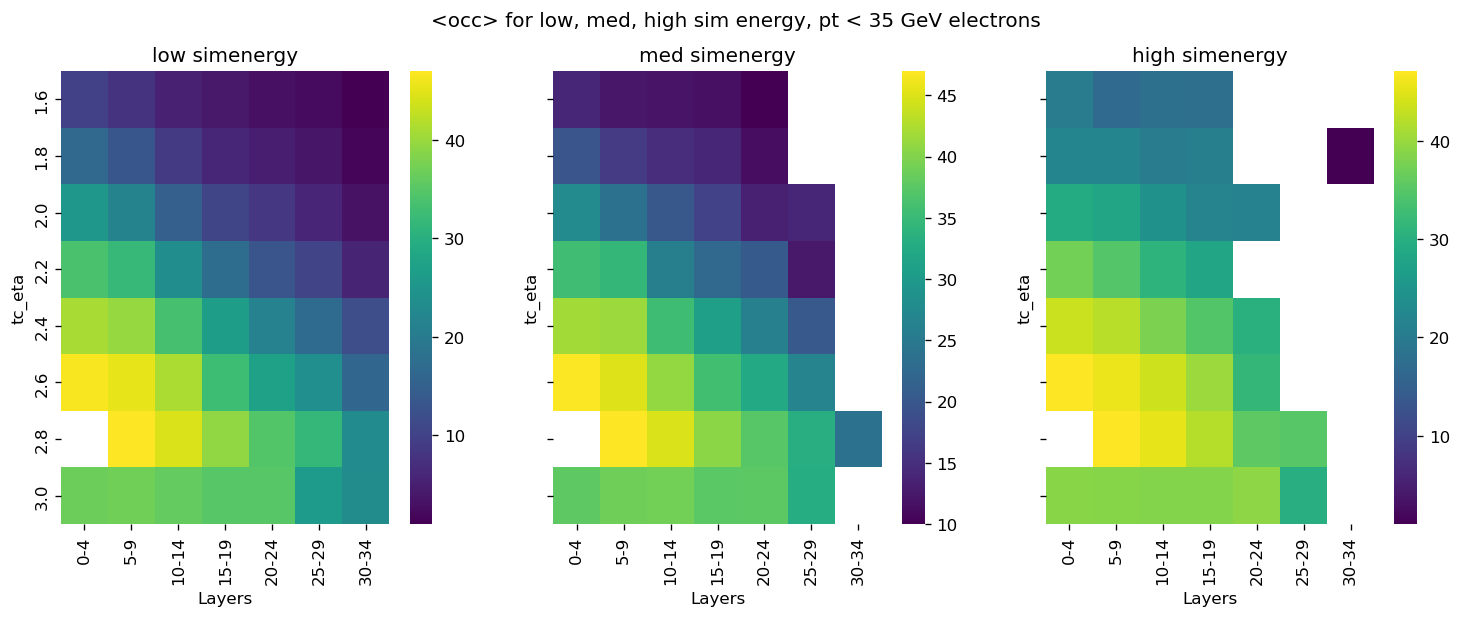

In [149]:
fig, axes = plt.subplots(1, 3,figsize = (15,5), sharex=True, sharey=True)
fig.suptitle('<occ> for low, med, high sim energy, pt < 35 GeV electrons')

sns.heatmap(low_mean,
            ax = axes[0],
           xticklabels =['0-4','5-9','10-14','15-19','20-24','25-29','30-34'],
           yticklabels = np.linspace(1.6,3.0,8),
           cmap = 'viridis')
axes[0].set_title('low simenergy')

axes[0].set_xlabel('Layers')
axes[0].set_ylabel('tc_eta')

sns.heatmap(med_mean,
            ax = axes[1],
           xticklabels =['0-4','5-9','10-14','15-19','20-24','25-29','30-34'],
           yticklabels = np.linspace(1.6,3.0,8),
           cmap = 'viridis')
axes[1].set_title('med simenergy')
axes[1].set_xlabel('Layers')
axes[1].set_ylabel('tc_eta')

sns.heatmap(high_mean,
            ax = axes[2],
           xticklabels =['0-4','5-9','10-14','15-19','20-24','25-29','30-34'],
           yticklabels = np.linspace(1.6,3.0,8),
           cmap = 'viridis')
axes[2].set_title('high simenergy')

axes[2].set_xlabel('Layers')
axes[2].set_ylabel('tc_eta');

In [150]:
layers = np.sort(w_sim['layer'].unique().astype('int'))

In [151]:
sum_sims = []
for layer in layers:
    sum = ((w_sim['simenergy'][w_sim.layer==layer]).sum())
    sum_sims.append(sum) 

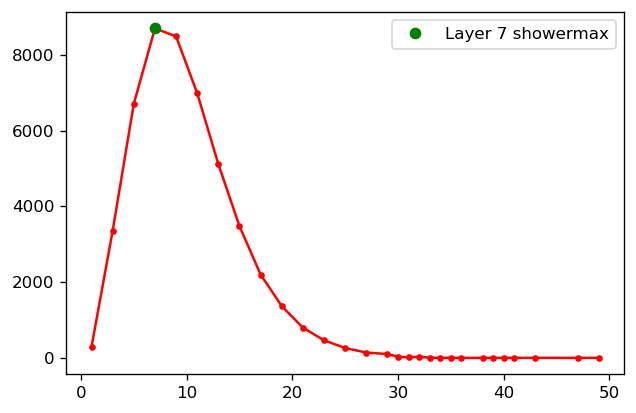

In [152]:
plt.plot(layers, sum_sims,'r.-')
plt.plot(layers[np.argmax(sum_sims)],np.max(sum_sims),'go',label ='Layer {} showermax'.format(layers[np.argmax(sum_sims)]))
plt.legend();

arbitrary eta cut on module position

In [153]:
eta_cut = 2.0

In [154]:
sh_max_low_eta = w_sim[w_sim.tc_eta < eta_cut][w_sim.layer == 7]
sh_max_high_eta = w_sim[w_sim.tc_eta >= eta_cut][w_sim.layer == 7]

/tmp/ipykernel_335/2659205144.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sh_max_low_eta = w_sim[w_sim.tc_eta < eta_cut][w_sim.layer == 7]
/tmp/ipykernel_335/2659205144.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sh_max_high_eta = w_sim[w_sim.tc_eta >= eta_cut][w_sim.layer == 7]


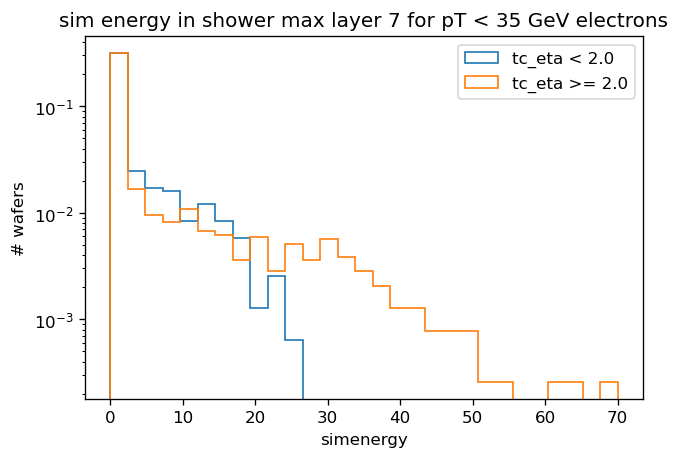

In [155]:
plt.hist(sh_max_low_eta['simenergy'],label = 'tc_eta < {}'.format(eta_cut),histtype='step',bins=np.linspace(0,70,30),density = True)
plt.hist(sh_max_high_eta['simenergy'],label = 'tc_eta >= {}'.format(eta_cut),histtype='step',bins=np.linspace(0,70,30),density = True)
plt.xlabel('simenergy')
plt.ylabel('# wafers')
plt.yscale('log')
plt.legend()
plt.title('sim energy in shower max layer 7 for pT < 35 GeV electrons');

low eta first

/tmp/ipykernel_335/3929780931.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = sh_max_low_eta[sh_max_low_eta.simenergy >= low_max][sh_max_low_eta.simenergy < med_max]


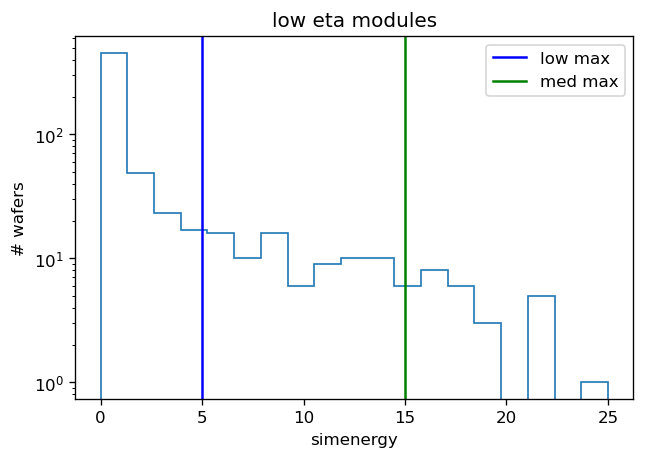

In [156]:
low_max, med_max = 5,15

low = sh_max_low_eta[sh_max_low_eta.simenergy < low_max]
med = sh_max_low_eta[sh_max_low_eta.simenergy >= low_max][sh_max_low_eta.simenergy < med_max]
high = sh_max_low_eta[sh_max_low_eta.simenergy >= med_max]

plt.close()
plt.hist(sh_max_low_eta['simenergy'],bins = np.linspace(0,25,20),color = 'tab:blue',histtype='step')
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.axvline(x = low_max,color = 'blue',label = 'low max')
plt.axvline(x = med_max,color = 'green',label = 'med max')
plt.legend()
plt.title('low eta modules');

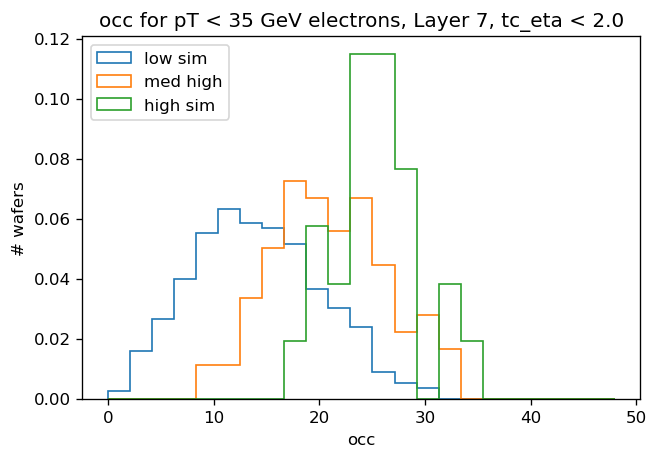

In [157]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
low_calQ = low[CALQ_COLS]
med_calQ = med[CALQ_COLS]
high_calQ = high[CALQ_COLS]

low_occ = np.count_nonzero(low_calQ,axis=1)
med_occ = np.count_nonzero(med_calQ,axis=1)
high_occ = np.count_nonzero(high_calQ,axis=1)


plt.hist(low_occ, bins = np.linspace(0,48,24),label = 'low sim',histtype='step', density = True)
plt.hist(med_occ, bins = np.linspace(0,48,24),label = 'med high',histtype='step',density = True)
plt.hist(high_occ, bins = np.linspace(0,48,24),label = 'high sim',histtype='step',density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons, Layer 7, tc_eta < {}'.format(eta_cut));

high eta now

/tmp/ipykernel_335/1935097543.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = sh_max_high_eta[sh_max_high_eta.simenergy >= low_max][sh_max_high_eta.simenergy < med_max]


Text(0.5, 1.0, 'high eta modules')

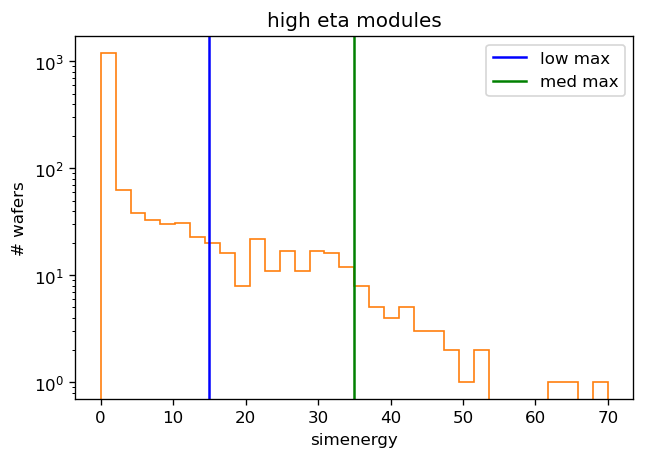

In [158]:
low_max, med_max = 15,35

low = sh_max_high_eta[sh_max_high_eta.simenergy < low_max]
med = sh_max_high_eta[sh_max_high_eta.simenergy >= low_max][sh_max_high_eta.simenergy < med_max]
high = sh_max_high_eta[sh_max_high_eta.simenergy >= med_max]

plt.close()
plt.hist(sh_max_high_eta['simenergy'],bins = np.linspace(0,70,35),color = 'tab:orange',histtype='step')
plt.yscale('log')
plt.ylabel('# wafers')
plt.xlabel('simenergy')
plt.axvline(x = low_max,color = 'blue',label = 'low max')
plt.axvline(x = med_max,color = 'green',label = 'med max')
plt.legend()
plt.title('high eta modules')

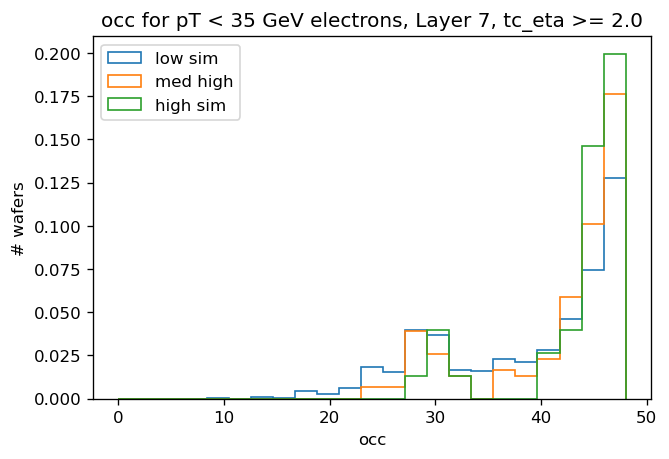

In [159]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
low_calQ = low[CALQ_COLS]
med_calQ = med[CALQ_COLS]
high_calQ = high[CALQ_COLS]

low_occ = np.count_nonzero(low_calQ,axis=1)
med_occ = np.count_nonzero(med_calQ,axis=1)
high_occ = np.count_nonzero(high_calQ,axis=1)

plt.hist(low_occ, bins = np.linspace(0,48,24),label = 'low sim',histtype='step', density = True)
plt.hist(med_occ, bins = np.linspace(0,48,24),label = 'med high',histtype='step', density = True)
plt.hist(high_occ, bins = np.linspace(0,48,24),label = 'high sim',histtype='step', density = True)
plt.xlabel('occ')
plt.ylabel('# wafers')
plt.legend(loc='upper left')
plt.title('occ for pT < 35 GeV electrons, Layer 7, tc_eta >= {}'.format(eta_cut));